<a href="https://colab.research.google.com/github/pranjalrawat007/Comp-Econ/blob/main/CakePy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

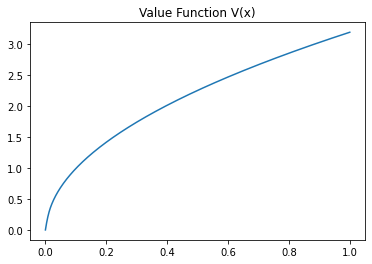

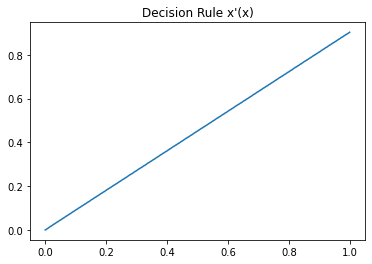

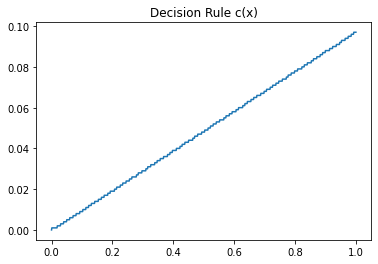

In [52]:
# Simple cake eating
# max sum beta^t * u(c(t)) 
# s.t. c(t) + x(t+1) = x(t), x(0) given

import numpy as np
x0 = 1
b = 0.95
u = lambda c: c**0.5

# V(x) = max u(x-x') + b*V_old(x') 
# s.t. 0 < x'< x

N = 1000
X = np.linspace(1e-6, x0, N) # State space
V_ = u(X) # initial guess for value function
V = np.zeros(N)
P = np.zeros(N)

for i in range(100):
    for ix, x in enumerate(X):
        V[ix] = np.max(u(x - X[X <= x]) + b*V_[X <= x])
        P[ix] = X[np.argmax(u(x - X[X <= x]) + b*V_[X <= x])]
    V_ = V.copy()

import matplotlib.pyplot as plt
plt.plot(X, V)
plt.title('Value Function V(x)')
plt.show()
plt.plot(X, P)
plt.title('Decision Rule x\'(x)')
plt.show()
plt.plot(X, X-P)
plt.title('Decision Rule c(x)')
plt.show()

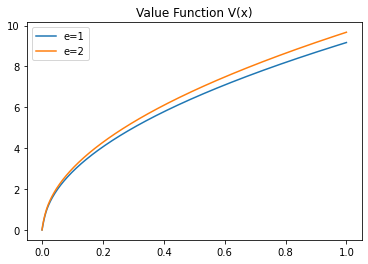

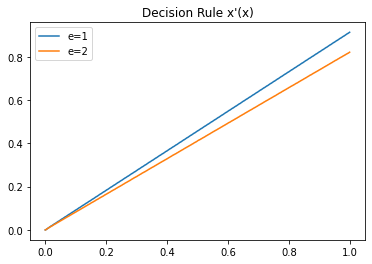

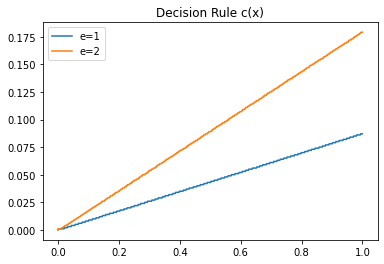

In [67]:
# Simple cake eating with taste shocks
# max E sum beta^t * u(c(t), e(t))
# s.t. c(t) + x(t+1) <= x(t), x(0) given
# E in {1,2,3}
# T(i,j) = P(e(t+1) = i| e(t) = j) = 1/3 

import numpy as np
x0 = 1
beta = 0.95
u = lambda c, e: c**0.5 * np.exp(e**0.5)

N_X = 1000
N_E = 2
X = np.linspace(1e-6, x0, N_X)  # Cake Space
E = np.arange(1, N_E+1, 1) # Shock Space
V_ = np.zeros((N_X, N_E))
V = np.zeros((N_X, N_E))
P = np.zeros((N_X, N_E))
T = np.ones((N_E, N_E))/N_E 
T = np.array([[0.9, 0.9], 
             [0.1, 0.1]]) # low probability of high taste shock



# V(x, e) = max u(x-x', e) + beta*E[V(x', e')|e], x0 given
for ix, x in enumerate(X):
    for ie, e in enumerate(E):
        V[ix, ie] = np.max(u(x - X[X <= x], e) + beta*np.dot(V_[X <= x, :], T[:, ie]))
        P[ix, ie] = X[np.argmax(u(x - X[X <= x], e) + beta*np.dot(V_[X <= x, :], T[:, ie]))]
    V_ = V.copy()

import matplotlib.pyplot as plt
for i, j in enumerate(E):
    plt.plot(X, V[:, i], label = f'e={j}')
plt.legend()
plt.title('Value Function V(x)')
plt.show()
for i, j in enumerate(E):
    plt.plot(X, P[:, i], label = f'e={j}')
plt.legend()
plt.title('Decision Rule x\'(x)')
plt.show()
for i, j in enumerate(E):
    plt.plot(X, X - P[:, i], label = f'e={j}')
plt.legend()
plt.title('Decision Rule c(x)')
plt.show()

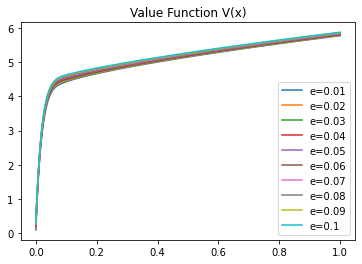

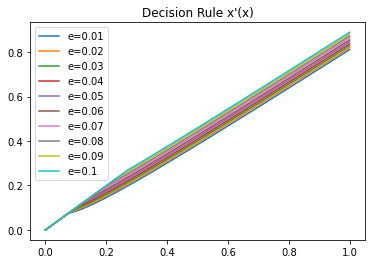

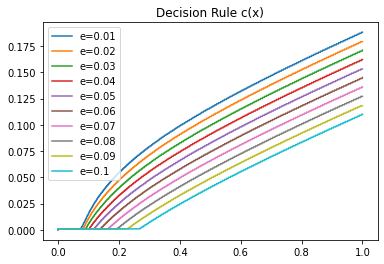

In [64]:
# Simple cake eating with income shocks
# max E sum beta^t * u(c(t))
# s.t. c(t) + x(t+1) <= x(t) + e(t), x(0) given
# E in {0.1, 0.2, ... }
# T(i,j) = P(e(t+1) = i| e(t) = j) = 1/|E| 

import numpy as np
x0 = 1
beta = 0.95
u = lambda c: c**0.5

N_X = 1000
N_E = 10
X = np.linspace(1e-6, x0, N_X)  # Cake Space
E = np.arange(1, N_E+1, 1)*0.01 # Shock Space
V_ = np.zeros((N_X, N_E))
V = np.zeros((N_X, N_E))
P = np.zeros((N_X, N_E))
T = np.ones((N_E, N_E))/N_E 

# V(x, y) = max u(x+e-x') + beta*E[V(x', y')|y], x0 given
for ix, x in enumerate(X):
    for ie, e in enumerate(E):
        V[ix, ie] = np.max(u(x+e - X[X <= x+e]) + beta*np.dot(V_[X <= x+e, :], T[:, ie]))
        P[ix, ie] = X[np.argmax(u(x+e - X[X <= x+e]) + beta*np.dot(V_[X <= x+e, :], T[:, ie]))]
    V_ = V.copy()

import matplotlib.pyplot as plt
for i, j in enumerate(E):
    plt.plot(X, V[:, i], label = f'e={j}')
plt.legend()
plt.title('Value Function V(x)')
plt.show()
for i, j in enumerate(E):
    plt.plot(X, P[:, i], label = f'e={j}')
plt.legend()
plt.title('Decision Rule x\'(x)')
plt.show()
for i, j in enumerate(E):
    plt.plot(X, X - P[:, i], label = f'e={j}')
plt.legend()
plt.title('Decision Rule c(x)')
plt.show()